# Sentiment analysis with Logistic Regression

### Some plotting functions

In [3]:
!git clone https://github.com/shrookehab/Machine_Learning1.git
%cd  Machine_Learning1/Logistic_Regression

Cloning into 'Machine_Learning1'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 54 (delta 17), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (54/54), done.
/content/Machine_Learning1/Logistic_Regression/Machine_Learning1/Logistic_Regression


In [5]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

In [6]:
import numpy as np
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[3,2],[2,3]])
labels = np.array([0,0,0,0,1,1,1,1])

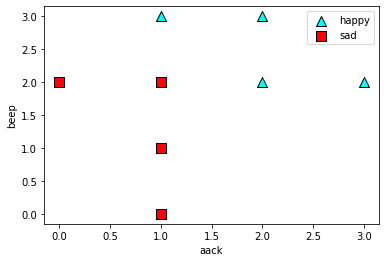

In [7]:
# Plotting the points
utils.plot_points(features, labels)

### Logistic regression

In [10]:
def sigmoid(x):
    ## TODO ##
    # implement sigmoid function
    output = 1 / (1 + np.exp(-x))
    return output

def score(weights, bias, features):
    return np.dot(weights, features) + bias

def prediction(weights, bias, features):
    ## TODO ##
    # implement prediction calculation using sigmoid and score functions
    output = sigmoid(score(weights, bias, features))
    return output

def log_loss(weights, bias, features, label):
    ## TODO ##
    # implement log_loss calculation using prediction function
    y_predict = prediction(weights, bias, features)
    output = -label * np.log(y_predict) - (1 - label) * np.log(1 - y_predict)
    return output

def total_log_loss(weights, bias, X, y):
    total_error = 0
    for i in range(len(X)):
        total_error += log_loss(weights, bias, X[i], y[i])
    return total_error

In [34]:
from numpy.ma.core import subtract
def logistic_trick(weights, bias, features, label, learning_rate = 0.01):
    ## TODO ##
    # update the weights and bias using a single data sample
    y_predict = prediction(weights, bias, features)
    # for i in range(len(weights)):
    #   weights[i] = weights[i] + learning_rate * (label - y_predict) * features[i]
    weights = np.add(weights, (np.multiply(learning_rate, np.multiply(np.subtract(label, y_predict), features))))
    bias = bias + learning_rate * (label - y_predict)

    return weights, bias

In [36]:
def logistic_regression_algorithm(features, labels, learning_rate = 0.05, epochs = 5000):
    utils.plot_points(features, labels)
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        # Comment the following line of code to remove the plots of all the classifiers
        utils.draw_line(weights[0], weights[1], bias, color='grey', linewidth=0.1, linestyle='dotted')
        errors.append(total_log_loss(weights, bias, features, labels))
        j = random.randint(0, len(features)-1)
        weights, bias = logistic_trick(weights, bias, features[j], labels[j])
    utils.draw_line(weights[0], weights[1], bias)
    plt.show()
    plt.scatter(range(epochs), errors)
    plt.xlabel('epochs')
    plt.ylabel('error')
    return weights, bias

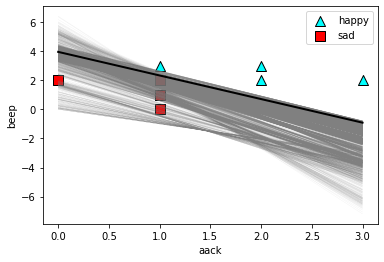

(array([1.65209723, 1.01765221]), -4.026326653855072)

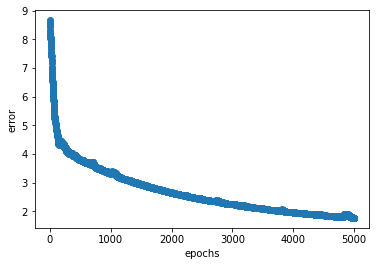

In [37]:
logistic_regression_algorithm(features, labels)

# Logistic SKlearn

In [17]:
from sklearn.linear_model import LogisticRegression
## TODO ##
# Use SKlearn to train logistic regression
clf = LogisticRegression(random_state=0).fit(features, labels)

In [18]:
clf.score(features, labels)

1.0

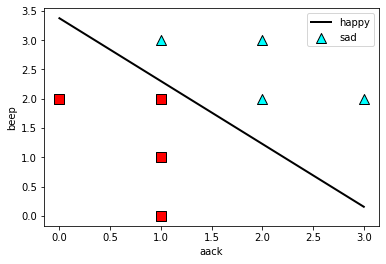

In [19]:
weights = clf.coef_
bias = clf.intercept_
utils.draw_line(weights[0][0], weights[0][1], bias)
utils.plot_points(features, labels)
plt.show()